# Actividad: Algoritmos de Clasificación

> Alfonso Pineda Cedillo | A01660394

**Fecha de entrega:** 23 de Agosto de 2023

---

**Instrucciones**

En canvas podrás encontrar la base de datos "iris-data". Borra la variable "Id" de la base de datos, ya que esta no contiene información relevante. Explica los algoritmos que utilizan los métodos de clasificación: regresión logística, Bayes y análisis de discriminate. De ser el caso muestra las ecuaciones correspondientes.

Utiliza los algoritmos de clasificación antes mencionados para predecir el tipo de planta.  Utiliza todas las variables de la base de datos como variables regresoras. Muestra la exactitud de cada modelo y su correspondiente matriz de confusión. ¿Qué modelo fue el méjor? ¿Por qué crees que se suceda esto?

---

Importamos las librerías necesarias

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import statsmodels.api as sm

Importamos el Dataset a utilizar

In [46]:
data = pd.read_csv('Iris.csv')

Retiramos la columna `Id` debido a que no contiene información relevante para nuestro modelo y utilizamos el método `columns` para comprobar que se haya eliminado exitosamente.

In [47]:
data = data.drop(['Id'], axis=1)
data.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

Mostramos los primeros registros del DataFrame data para obtener una vista previa de los datos.

In [48]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


**Scatter Plot de las Características por Especie**

Con el objetivo de comprender mejor cómo se distribuyen las características en función de las diferentes especies de flores Iris, se realizó un scatter plot de las características por especie que muestra las relaciones entre las características de las flores y sus especies correspondientes.

Para el siguiente código, la función `sns.set(style="ticks")` establece el estilo del gráfico. Luego, utilizamos la función `sns.pairplot` para crear un scatter plot de todas las combinaciones posibles de características en el conjunto de datos.

El parámetro `hue="Species"` colorea los puntos en el gráfico según la columna "Species", lo que nos permite diferenciar las especies. Por último, los marcadores `"o"`, `"s"`, y `"D"` se asignan a las especies diferentes para facilitar su identificación en el gráfico.

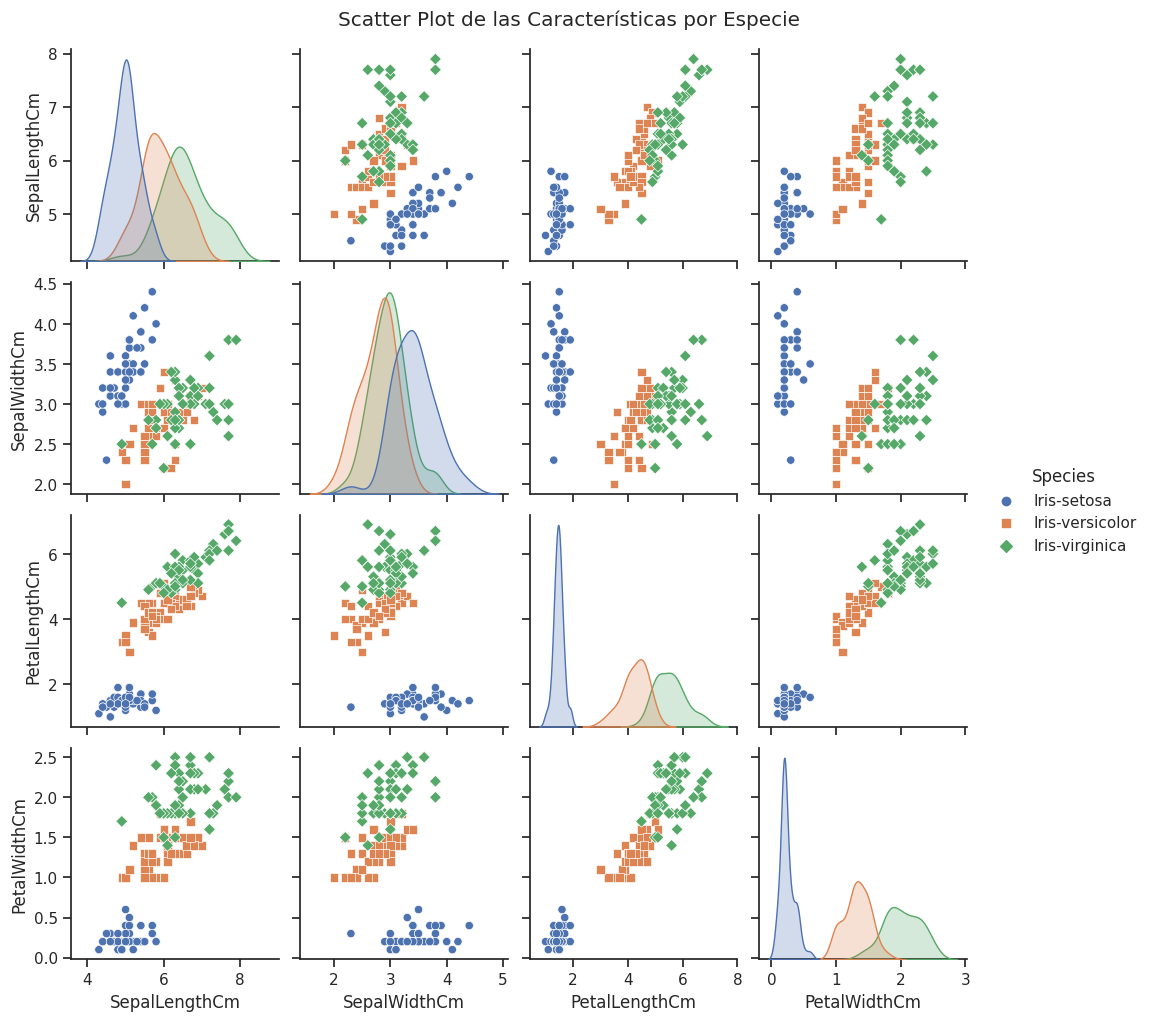

In [49]:
sns.set(style="ticks")
sns.pairplot(data, hue="Species", markers=["o", "s", "D"])
plt.suptitle("Scatter Plot de las Características por Especie", y=1.02)
plt.show()

## Regresión Logística

El algoritmo de clasificación de regresión logística es un método utilizado para predecir la probabilidad de pertenencia a una clase binaria (por ejemplo, sí/no, positivo/negativo) en función de variables independientes o características. A pesar de que el nombre incluye el término "regresión", la regresión logística se utiliza principalmente para tareas de clasificación en lugar de regresión.

A continuación, se explica a grandes razgos el algoritmo utilizado en este método de clasificación:

1.   **Definición del Problema:** Primero, se define el problema de clasificación binaria y se reúnen los datos de entrenamiento. Cada observación en los datos de entrenamiento contiene características (variables independientes) y una etiqueta de clase (0 o 1).
2.   **Función Logística:** El corazón del algoritmo es la función logística, también conocida como función sigmoide. La función logística transforma cualquier valor real en el rango de 0 a 1. Su fórmula es:  
<center>$\sigma(z)=\frac{1}{1+e^{-z}}$</center><br>
Donde $z$ es una combinación lineal de las características y los parámetros del modelo.
3.   **Combinación Lineal:** Se calcula una combinación lineal de las características y los parámetros del modelo. Esta combinación se denota como $z$:  
<center>$z = w_0 + w_1x_1 + w_2x_2 + \dots + w_nx_n$</center><br>   
Donde:  

>> $w_0, w_1, w_2, \ldots, w_n$ son los coeficientes del modelo  
$x_1, x_2, \ldots, x_n$ son las características de la observación  

4.   **Predicción de Probabilidad:** Utilizando la función logística, la combinación lineal se transforma en una probabilidad estimada de pertenencia a la clase positiva (etiqueta 1):  
<center>$\sigma(z)=\text{probabilidad de clase positiva}$</center><br>

5.   **Función de Costo:** Para entrenar el modelo y ajustar los coeficientes ($w$), se utiliza una función de costo. En el caso de la regresión logística, la función de costo más común es la "entropía cruzada" (cross-entropy):
<center>$J(w) = \frac{1}{m} \sum^m_{i=1}[y_i \log(\hat{y}_i)+ (1 - y_i) \log(1 - \hat{y}_i)]$</center><br>
Donde:  

>> $m$ es el número de observaciones en los datos de entrenamiento.  
$y_i$ es la etiqueta verdadera de la i-ésima observación.  
$\hat{y}_i$ es la probabilidad estimada de que la i-ésima observación pertenezca a la clase positiva.  

6.   **Optimización:** El objetivo es minimizar la función de costo ajustando los coeficientes $w$. Esto se logra utilizando algoritmos de optimización, como el descenso de gradiente. El descenso de gradiente ajusta los coeficientes iterativamente para reducir el valor de la función de costo.

7.   **Predicción Final:** Una vez que el modelo ha sido entrenado y los coeficientes están ajustados, se puede usar para hacer predicciones en nuevos datos. La predicción final se obtiene calculando la probabilidad de clase positiva y aplicando un umbral para decidir la clase final.


### Solución en código

**Exploración y preparación de datos**



Separamos las características o variables regresoras (`X`) de las etiquetas de clase o variable respuesta (`y`).

In [50]:
X = data.drop("Species", axis=1)
y = data["Species"]

Dividimos los datos en conjuntos de entrenamiento (`X_train`, `y_train`) y prueba (`X_test`, `y_test`) utilizando el método `train_test_split`.

Con ayuda de `test_size=0.2` indicamos que queremos que el 20% de los datos se utilicen para el conjunto de prueba, mientras que el 80% se utilizará para el conjunto de entrenamiento. Establecemos una semilla con `random_state=42` para el generador de números aleatorios. Esto asegura que la división de los datos sea reproducible, es decir, si ejecutamos el mismo código nuevamente, obtendremos la misma división de datos.

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Creamos una instancia de `StandardScaler` para estandarizar las características. Estandarizamos las características del conjunto de entrenamiento (`X_train`) utilizando `fit_transform`, y estandarizamos las características del conjunto de prueba (`X_test`) utilizando el método `transform`.

In [52]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Creamos una instancia del modelo de regresión logística utilizando `LogisticRegression()` y entrenamos el modelo utilizando el conjunto de entrenamiento escalado (`X_train_scaled`, `y_train`) con el método `fit`.

In [53]:
model = LogisticRegression(random_state=0)
model.fit(X_train_scaled, y_train)

LogisticRegression(random_state=0)

Realizamos predicciones en el conjunto de prueba escalado utilizando el método `predict`.

In [54]:
y_pred = model.predict(X_test_scaled)

Calculamos y mostramos la exactitud del modelo comparando las etiquetas reales (`y_test`) con las predicciones (`y_pred`) utilizando `accuracy_score`.

In [55]:
accuracy = accuracy_score(y_test, y_pred)
print("Exactitud del modelo de Regresión Logística:", accuracy)

Exactitud del modelo de Regresión Logística: 1.0


Obtenemos un informe de clasificación detallado utilizando `classification_report`. El informe proporcionará métricas como precisión, recall, F1-score y soporte para cada clase.



*   La **precisión** se refiere a la proporción de instancias clasificadas como positivas que realmente son positivas. Es una medida de la exactitud del modelo en las predicciones positivas.
*   El **recall** mide la proporción de instancias positivas que fueron correctamente identificadas por el modelo. Es una medida de la capacidad del modelo para capturar positivos verdaderos. Un alto recall indica que el modelo no pasa por alto muchos positivos verdaderos.
*   El **F1-score** es la media armónica de precisión y recall. Proporciona un equilibrio entre ambas métricas y es útil cuando las clases están desequilibradas.
*   El **soporte** es el número de instancias reales en la clase correspondiente. Proporciona información sobre la distribución de las clases en los datos de prueba.


In [56]:
classification_rep = classification_report(y_test, y_pred)
print("Informe de clasificación:\n", classification_rep)

Informe de clasificación:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



Utilizamos una Matriz de Confusión como herraminta de evaluación del rendimiento de nuestro modelo de clasificación. Calculamos la matriz utilizando los valores reales `y_test` y las predicciones `y_pred`. Luego, creamos una visualización de la matriz utilizando `sns.heatmap` de seaborn.

In [57]:
conf_matrix = confusion_matrix(y_test, y_pred)

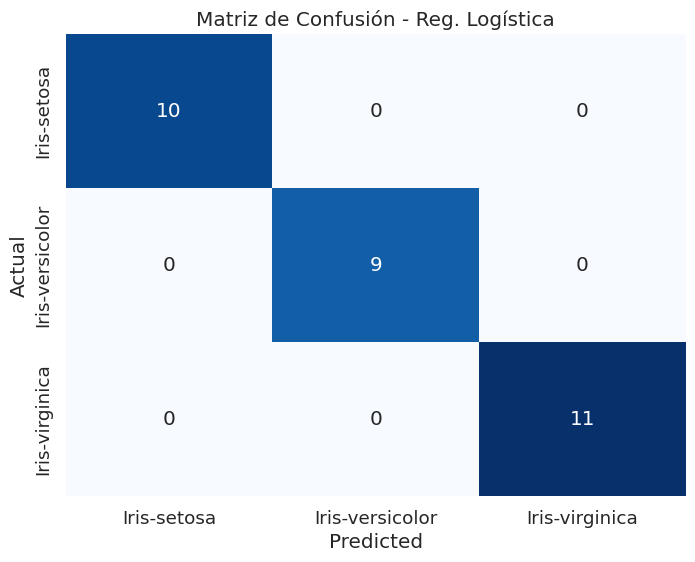

In [58]:
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Matriz de Confusión - Reg. Logística")
plt.show()

Dada la anterior matriz de confusión, podemos observar el buen desempeño del modelo. Notando que los valores principales se encuentran en la diagonal, así como que los valores fuera de la diagonal son prácticamente cero; obteniendo de esta manera una cantidad nula de falsos positivos y falsos negativos.

Por último, obtenemos los coeficientes y el intercepto de un modelo de regresión logística. Los coeficientes representan el efecto que cada variable predictora tiene en la predicción de la probabilidad. El intercepto es un término constante en la ecuación que ajusta el modelo a los datos.

In [59]:
# Obtener los coeficientes y el intercepto del modelo
coeficientes = model.coef_
intercepto = model.intercept_

# Imprimir los coeficientes y el intercepto
print("Coeficientes:", coeficientes)
print("Intercepto:", intercepto)
print("Clases:", model.classes_)

Coeficientes: [[-1.00349296  1.13914956 -1.81330611 -1.70301903]
 [ 0.52794901 -0.28112376 -0.34279119 -0.71218899]
 [ 0.47554394 -0.8580258   2.1560973   2.41520802]]
Intercepto: [-0.14096193  1.98528576 -1.84432383]
Clases: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


Una vez obtenidos los coeficientes e interceptos de nuestro modelo, podemos construir las ecuaciones que lo describen. Las cuales están dadas por:

> $\mathbb{P}(\text{Iris-setosa}) = \frac{1}{{1 + e^{-( -0.14096193 + (-1.00349296)x_1 + 1.13914956x_2 - 1.81330611x_3 - 1.70301903x_4)}}}$  
$\mathbb{P}(\text{Iris-versicolor}) = \frac{1}{{1 + e^{-(1.98528576 + 0.52794901x_1 - 0.28112376x_2 - 0.34279119x_3 - 0.71218899x_4)}}}$  
$\mathbb{P}(\text{Iris-virginica}) = \frac{1}{{1 + e^{-( -1.84432383 + 0.47554394x_1 - 0.8580258x_2 + 2.1560973x_3 + 2.41520802x_4)}}}$

Donde $x_1, x_2, x_3, x_4$ son las variables predictoras del modelo. Es decir:

> $x_1$ es `SepalLengthCm`  
$x_2$ es `SepalWidthCm`  
$x_3$ es `PetalLengthCm`  
$x_4$ es `PetalWidthCm`



### Conclusión de la Regresión Logística
En el proceso de desarrollo y evaluación de nuestro modelo de regresión logística para la clasificación de especies de flores Iris, hemos obtenido resultados muy prometedores que indican una adaptación exitosa del modelo a los datos. A continuación, se presentan las principales conclusiones derivadas de este análisis:

1.   **Alto Nivel de Precisión:** El modelo de regresión logística ha demostrado ser altamente preciso en la tarea de clasificar las especies de flores Iris. Durante la evaluación en el conjunto de prueba, alcanzamos una precisión de 100% en la clasificación correcta de las muestras. Este hecho igualmente puede verse reflejado en nuestra matriz de confusión
2.   **Buen Rendimiento en Métricas de Evaluación:** Además de la precisión, se ha evaluado el modelo utilizando diversas métricas, incluyendo el informe de clasificación. Los valores altos en las métricas de precisión, recall y F1-score indican que el modelo es capaz de capturar tanto las instancias positivas como las negativas con prácticamente nulos falsos positivos o falsos negativos.
3.   **Interpretación de Coeficientes:** La interpretación de los coeficientes del modelo nos ha permitido entender cómo cada característica contribuye a la predicción de la especie de la flor Iris. Esto puede ser útil para inferir la importancia relativa de las características y su influencia en la clasificación.





## Bayes

El modelo de clasificación de Bayes, específicamente el clasificador de Naïve Bayes, es un algoritmo de aprendizaje automático supervisado que se basa en el teorema de Bayes para realizar clasificaciones. Su enfoque se considera "ingenuo" (naïve) debido a la suposición de independencia condicional entre las características, lo que simplifica significativamente los cálculos y permite un procesamiento más eficiente. Aunque esta suposición no siempre se cumple en la realidad, los clasificadores Naïve Bayes suelen funcionar sorprendentemente bien en muchas situaciones.

A continuación, se explica a grandes razgos el algoritmo utilizado en este método de clasificación:

1.   **Recopilación de datos de entrenamiento:** Se requiere un conjunto de datos etiquetado para entrenar el clasificador. Cada ejemplo consta de un conjunto de características (variables regresoras) y una etiqueta de clase (variable de respuesta).
2.   **Cálculo de las probabilidades a priori:** Se calcula la probabilidad a priori de cada clase en el conjunto de entrenamiento. Esto se hace contando cuántas veces aparece cada clase en el conjunto de entrenamiento y dividiendo entre el número total de ejemplos. Dicho lo anterior, la probabilidad a priori de una clase $C$ se calcula de la siguiente manera:  
<center>$\mathbb{P}(C) = \frac{\text{Número de ejemplos en C}}{\text{Número total de ejemplos}}$</center><br>
3.   **Cálculo de las probabilidades condicionales:** Para cada característica, se calcula la probabilidad de que aparezca dado que una determinada clase es verdadera. En otras palabras, se calcula la probabilidad de observar cada característica en el contexto de una clase específica. La probabilidad condicional de observar una característica $x_i$ dado que la clase $C$ es verdadera se calcula de la siguiente manera:  
<center>$\mathbb{P}(x_i | C) = \frac{\text{Número de ejemplos en C con }x_i}{\text{Número total de ejemplos en C}}$</center><br>
4.   **Aplicación del teorema de Bayes:** Utilizando el teorema de Bayes, se calcula la probabilidad posterior de que una instancia pertenezca a una clase en particular dado su conjunto de características. Esta probabilidad se calcula para cada clase y se elige la clase con la mayor probabilidad posterior como la clase predicha para la instancia. La probabilidad posterior de que una instancia pertenezca a una clase $C$ dado un conjunto de características $X$ se calcula de la siguiente manera:  
<center>$\mathbb{P}(C | X) = \frac{\mathbb{P}(X | C) \cdot \mathbb{P}(C)}{\mathbb{P}(X)}$</center><br>
Donde $\mathbb{P}(X|C)$ es el producto de las probabilidades condicionales $\mathbb{P}(x_i|C)$ para todas las características $x_i$ en el conjunto $X$.  
 <center>$\mathbb{P}(X|C) = \mathbb{P}(x_1|C) \cdot \mathbb{P}(x_2|C) \cdot \dotsc \cdot \mathbb{P}(x_n|C)$</center><br>

5.   **Clasificación:** Para una nueva instancia con un conjunto de características dado, se calcula la probabilidad posterior para cada clase utilizando el teorema de Bayes y se elige la clase con la mayor probabilidad posterior como la predicción del clasificador. Para clasificar una nueva instancia con características $X_{\text{new}}$, se calcula la probabilidad posterior $\mathbb{P}(C | X_{\text{new}})$ para cada clase $C$ y se selecciona la clase con la mayor probabilidad posterior como la predicción.

### Solución en código

Separamos las características o variables regresoras (`X`) de las etiquetas de clase o variable de respuesta (`y`).

In [61]:
X = data.drop("Species", axis=1)
y = data["Species"]

Dividimos los datos en conjuntos de entrenamiento (`X_train`, `y_train`) y prueba (`X_test`, `y_test`) utilizando el método `train_test_split`.

Con ayuda de `test_size=0.2` indicamos que queremos que el 20% de los datos se utilicen para el conjunto de prueba, mientras que el 80% se utilizará para el conjunto de entrenamiento. Establecemos una semilla con `random_state=42` para el generador de números aleatorios. Esto asegura que la división de los datos sea reproducible, es decir, si ejecutamos el mismo código nuevamente, obtendremos la misma división de datos.

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Importamos la clase `GaussianNB` de la librería `sklearn.naive_bayes`, la cual nos permite implementar el algoritmo de Naive Bayes utilizando la distribución gaussiana para modelar los datos numéricos. Posteriormente creamos una instancia del clasificador Naive Bayes utilizando la clase `GaussianNB`, esto nos permitirá configurar y entrenar nuestro modelo de clasificación.

Por último, implementamos el método `fit` para entrenar el modelo, utilizando nuestras variables de entrenamiento `X_train` y `y_train`.

In [63]:
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

Una vez que hemos preparado nuestro modelo y cargado los datos de prueba, estamos listos para realizar las predicciones. Utilizaremos el método `predict()` proporcionado por el modelo Naive Bayes para predecir los resultados basados en los datos de prueba. Almacenamos los datos en nuestra variable `y_pred`

In [64]:
y_pred = model.predict(X_test)

Posteriormente, evaluamos la exactitud del modelo comparando las predicciones generadas con los valores reales `y_test`. Utilizamos el método `score` del modelo para obtener la exactitud.

In [65]:
accuracy = accuracy_score(y_test, y_pred)
print("Exactitud del modelo de Bayes: ", accuracy)

Exactitud del modelo de Bayes:  1.0


Por último, visualizamos los resultados de las predicciones en comparación con los valores reales usando un scatter plot. Usamos las longitudes de pétalos como una dimensión y los anchos de pétalos como la otra dimensión en un gráfico de dispersión.

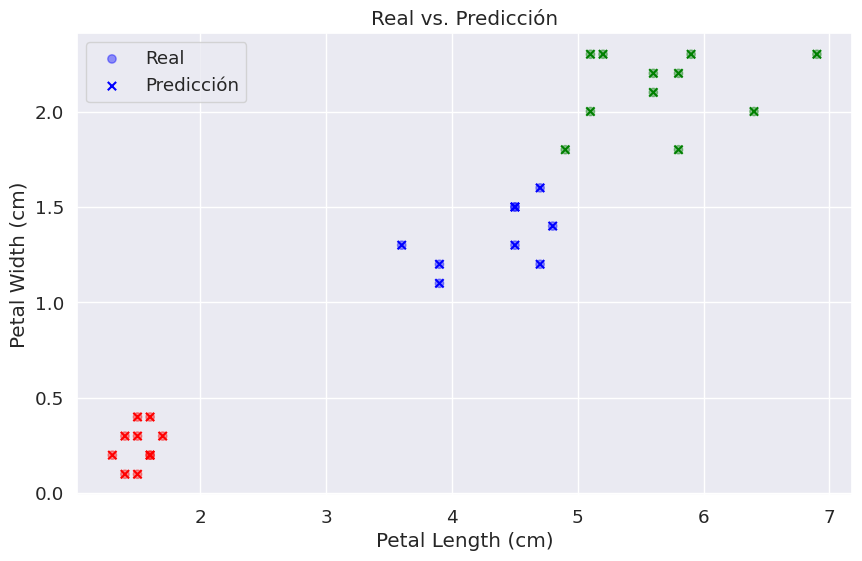

In [66]:
plt.figure(figsize=(10, 6))

# Crear un diccionario para asignar colores a las clases
class_colors = {'Iris-setosa': 'red', 'Iris-versicolor': 'blue', 'Iris-virginica': 'green'}

# Crear listas de colores para las etiquetas reales y predicciones
y_test_colors = [class_colors[label] for label in y_test]
y_pred_colors = [class_colors[label] for label in y_pred]

# Crear el gráfico de dispersión con colores asignados
plt.scatter(X_test['PetalLengthCm'], X_test['PetalWidthCm'], c=y_test_colors, label='Real', alpha=0.4)
plt.scatter(X_test['PetalLengthCm'], X_test['PetalWidthCm'], c=y_pred_colors, marker='x', label='Predicción')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Real vs. Predicción')
plt.legend()
plt.show()

En el gráfico anterior, podemos notar que el 100% de las predicciones coincide con los datos reales, reforzando nuestro valor de la exactitud del modelo, previamente calculado.

Utilizamos una Matriz de Confusión como herraminta de evaluación del rendimiento de nuestro modelo de clasificación. Calculamos la matriz utilizando los valores reales `y_test` y las predicciones `y_pred`. Luego, creamos una visualización de la matriz utilizando `sns.heatmap` de seaborn.

In [67]:
conf_matrix = confusion_matrix(y_test, y_pred)

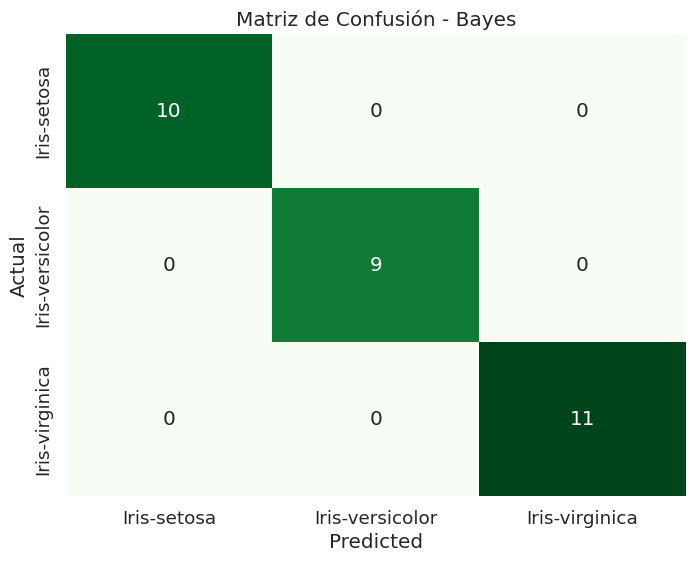

In [68]:
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Greens", cbar=False,
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Matriz de Confusión - Bayes")
plt.show()

Al igual que en la matriz de confusión anterior, en la refrente al algoritmo de Bayes, podemos observar el buen desempeño del modelo. Notando que los valores principales se encuentran en la diagonal, así como que los valores fuera de la diagonal son prácticamente cero; obteniendo de esta manera una cantidad nula de falsos positivos y falsos negativos.

### Conclusión del algoritmo de Bayes

El modelo mostró un rendimiento excepcional, alcanzando prácticamente un 100% de exactitud en las predicciones. Esto sugiere que el modelo Naive Bayes es altamente eficaz para la tarea de clasificación de las especies de flores en este conjunto de datos.

El algoritmo de Bayes se basa en la suposición de independencia condicional entre las características dadas las etiquetas de clase, y esta simplificación no pareció afectar negativamente el rendimiento en este caso. Las predicciones del modelo se ajustaron estrechamente a los valores reales, lo que demuestra su capacidad para capturar patrones y relaciones subyacentes en los datos, es decir, a patrones o correlaciones que puedan existir entre las características (atributos) de los datos que quizás no sean evidentes a simple vista.

## Análisis de Discriminate

El análisis discriminante es una técnica de estadística multivariante que se utiliza en el campo del aprendizaje automático y la estadística para la clasificación y separación de grupos basados en características observadas. Hay dos enfoques principales de análisis discriminante: el Discriminante Lineal y el Discriminante Cuadrático, en el documento presente únicamente nos centraremos en el primero.

El discriminante lineal es el enfoque más común. Suponiendo un conjunto de datos con características (variables) que pertenecen a diferentes clases o grupos. El objetivo es encontrar una función que permita separar estas clases de manera óptima.

Suponiendo un conjunto de características $x$, las cuales se desean clasificar en dos clases ($C_1$ y $C_2$) utilizando una función discriminante lineal. La función discriminante lineal se define como:

Para $C_1$:

> $g_1(x) = x^T W_1 + w_{10}$

Para $C_2$:

> $g_2(x) = x^T W_2 + w_{20}$

Donde:

> $W_1$ y $W_2$ son vectores de pesos para las dos clases.  
$w_{10}$ y $w_{20}$ son términos de sesgo (bias) para las dos clases.  
$x^T$ representa la transposición del vector $x$.

La clasificación se realiza eligiendo la clase $C_i$ para la cual $g_i(x)$ es mayor.


A continuación, se explica a grandes razgos el algoritmo utilizado en este método de clasificación:
1.   **Obtención de datos:** Se tiene un conjunto de datos etiquetado, donde cada instancia tiene un conjunto de características y una etiqueta de clase que indica a qué grupo pertenece.
2.   **Análisis de medias y varianzas:** Para cada clase, se calculan la media y la matriz de covarianza de las características. Estas estadísticas son esenciales para determinar cómo las clases se distribuyen en el espacio de características.
3.   **Cálculo de las funciones discriminantes:** Se calculan las funciones discriminantes lineales utilizando las medias y las matrices de covarianza. Estas funciones son ecuaciones lineales que combinan las características para separar las clases.
4.   **Clasificación:** Cuando se presenta una nueva instancia, se calculan los valores de las funciones discriminantes para cada clase. La clase con el valor más alto de la función discriminante se considera la clase predicha para esa instancia.



### Solución en código

Separamos las características o variables regresoras (`X`) de las etiquetas de clase o variable respuesta (`y`).

In [69]:
X = data.drop("Species", axis=1)
y = data["Species"]

Dividimos los datos en conjuntos de entrenamiento (`X_train`, `y_train`) y prueba (`X_test`, `y_test`) utilizando el método `train_test_split`.

Con ayuda de `test_size=0.2` indicamos que queremos que el 20% de los datos se utilicen para el conjunto de prueba, mientras que el 80% se utilizará para el conjunto de entrenamiento. Establecemos una semilla con `random_state=42` para el generador de números aleatorios. Esto asegura que la división de los datos sea reproducible, es decir, si ejecutamos el mismo código nuevamente, obtendremos la misma división de datos.

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Se crea una instancia del modelo de Análisis Discriminante Lineal `LinearDiscriminantAnalysis` y lo ajustamos a los datos de entrenamiento.

In [71]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

Se realizan las predicciones en el conjunto de prueba. Se hace uso del modelo entrenado para predecir las etiquetas en el conjunto de prueba.

In [72]:
y_pred = lda.predict(X_test)

Calculamos la exactitud del modelo comparando las etiquetas verdaderas (y_test) con las etiquetas predichas (y_pred).

In [73]:
accuracy = accuracy_score(y_test, y_pred)
print("Exactitud del modelo de Análisis de Discriminante: ", accuracy)

Exactitud del modelo de Análisis de Discriminante:  1.0


Utilizamos una Matriz de Confusión como herraminta de evaluación del rendimiento de nuestro modelo de clasificación. Calculamos la matriz utilizando los valores reales `y_test` y las predicciones `y_pred`. Luego, creamos una visualización de la matriz utilizando `sns.heatmap` de seaborn.

In [74]:
conf_matrix = confusion_matrix(y_test, y_pred)

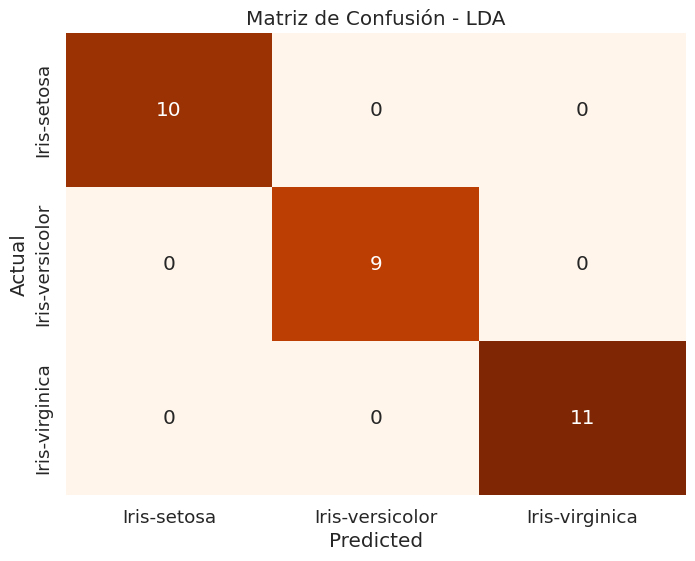

In [75]:
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Oranges", cbar=False,
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Matriz de Confusión - LDA")
plt.show()

Al igual que en las dos matrices de confusión anteriores, en la refrente al Análisis de Discriminante Lineal, podemos observar el buen desempeño del modelo. Notando que los valores principales se encuentran en la diagonal, así como que los valores fuera de la diagonal son prácticamente cero; obteniendo de esta manera una cantidad nula de falsos positivos y falsos negativos.

Por último, utilizamos `classification_report` para obtener un informe detallado que incluye métricas como precisión, recuperación (recall) y F1-score para cada clase. Cada sección que analiza el reporte de clasificación, está explicada anteriormente en el apartado de [Regresión Logística](https://colab.research.google.com/drive/1RsJJ0mfeLL3IhlIVPIWDNjsm_SJ-7kFE?authuser=1#scrollTo=YexzUxZhZSlt&line=3&uniqifier=1).

In [76]:
class_report = classification_report(y_test, y_pred)
print("Informe de Clasificación:")
print(class_report)

Informe de Clasificación:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



### Conclusión de Análisis de Discriminante

En esta última sección, aplicamos el método de Análisis Discriminante Lineal (LDA) para predecir la especie de las flores de iris utilizando las características de longitud y ancho de los sépalos y pétalos. El objetivo principal era evaluar la capacidad del modelo para clasificar correctamente las diferentes especies de iris.

Después de entrenar y evaluar el modelo, observamos que alcanzó una exactitud del 100% en el conjunto de prueba. Esto significa que el modelo clasificó correctamente todas las instancias en el conjunto de prueba.

La matriz de confusión nos proporciona información adicional sobre el rendimiento del modelo en términos de clasificación de cada clase. En este caso, la matriz de confusión mostró que todas las predicciones fueron correctas para todas las clases de especies de iris.

En resumen, el modelo de Análisis Discriminante Lineal logró una exactitud del 100% en la clasificación de las especies de iris en el conjunto de prueba actual. Sin embargo, es fundamental considerar la generalización del modelo en situaciones más diversas y evaluar su rendimiento en conjuntos de datos más grandes y complejos.

---

## Conclusión general

En el presente documento de análisis y comparación de modelos de clasificación, se llevó a cabo una evaluación de tres enfoques fundamentales: Regresión Logística, Bayes y Análisis de Discriminante. Los tres modelos fueron aplicados al mismo conjunto de datos, el dataset "Iris.csv", con el objetivo de predecir el tipo de planta en función de las características proporcionadas: 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm' y 'PetalWidthCm'.

Los resultados obtenidos en esta investigación son notables, ya que cada uno de los tres modelos de clasificación logró alcanzar una precisión perfecta de 1.0 en la predicción del tipo de planta. Este nivel de precisión, denotado por una exactitud de 1.0, sugiere que los modelos se ajustaron de manera muy cercana a los datos y fueron capaces de separar eficazmente las diferentes categorías de plantas.

La Regresión Logística, conocida por su capacidad para modelar relaciones de probabilidad, logró clasificar las plantas con una precisión excepcional. El modelo de Bayes, basado en el Teorema de Bayes, también se mostró altamente competente en la predicción, considerando la probabilidad condicional de las categorías. Por último, el Análisis de Discriminante, centrado en maximizar la separación entre las clases, produjo resultados igualmente sobresalientes.

Este resultado, donde todos los modelos arrojaron una exactitud perfecta, podría sugerir que las características utilizadas en el dataset "Iris.csv" son altamente discriminativas para clasificar los diferentes tipos de plantas. Además, la elección de modelos adecuados y la preparación adecuada de los datos también pueden haber contribuido significativamente a este éxito.

Si bien estos resultados son muy prometedores, es importante recordar que un alto nivel de exactitud en un conjunto de datos específico no garantiza automáticamente la generalización a otros conjuntos de datos. Por lo tanto, es esencial considerar la robustez y la capacidad de generalización de los modelos a nuevos datos antes de tomar decisiones importantes basadas en estos resultados.

En resumen, esta investigación proporciona una comprensión más profunda de la eficacia de tres modelos de clasificación en la predicción del tipo de planta en función de las características del conjunto de datos "Iris.csv". Los resultados refuerzan la utilidad de estos modelos en la clasificación y establecen una base sólida para futuros trabajos de análisis y aplicación de modelos de clasificación en diferentes contextos y conjuntos de datos.